In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('logistic retention.csv')

In [3]:
df.head()

,player_id,matches_first5,win_rate_first5,avg_kills_first5,reached_second_match,activated_3_matches,retained_14d
0,--AZyG3uSuPSQDDZObYfDNHNn9F4T2ADZDB9pMPsu3my2T...,1,0.0,4.0,0,0,0
1,--FpKd5T7erv5-Ztr-3QgzV_UpC-84nbDOZmgFVLT9zmwa...,1,1.0,7.0,0,0,0
2,--LXXLAKqvpwdZaCcgudmX5FWHqhEX-eG3peB1GPoFFQaU...,1,0.0,4.0,0,0,0
3,-_CFyiqGuXct4ToceBTBjrv9y1D1Xq_VL64UL03yduIjSm...,1,0.0,11.0,0,0,1
4,-_smzsD5p1NHEiOJhOV_j0syKqRfYLvDoG92jGO5Q9MCd5...,1,0.0,7.0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_id             12760 non-null  object 
 1   matches_first5        12760 non-null  int64  
 2   win_rate_first5       12760 non-null  float64
 3   avg_kills_first5      12760 non-null  float64
 4   reached_second_match  12760 non-null  int64  
 5   activated_3_matches   12760 non-null  int64  
 6   retained_14d          12760 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 697.9+ KB


In [5]:
X = df.drop(['player_id', 'retained_14d'], axis=1)
y = df['retained_14d']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [17]:
predictions = model.predict(X_test)
prediction_proba = (model.predict_proba(X_test)[:, 1] > 0.2).astype(int)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [19]:
print("LOGISTIC REGRESSION RESULTS")
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

LOGISTIC REGRESSION RESULTS
ROC-AUC Score: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.59      0.70      3301
           1       0.15      0.46      0.23       527

    accuracy                           0.57      3828
   macro avg       0.51      0.53      0.47      3828
weighted avg       0.77      0.57      0.64      3828


Confusion Matrix:
[[1940 1361]
 [ 283  244]]


In [36]:
import joblib

In [37]:
joblib.dump(model, 'rf=model.pkl')

['rf=model.pkl']

In [30]:
#Extract Coefficient
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()

feature_importance = feature_importance.sort_values(
    by='abs_coefficient',
    ascending=False
)

feature_importance

,feature,coefficient,abs_coefficient
4,activated_3_matches,0.761803,0.761803
3,reached_second_match,0.670108,0.670108
1,win_rate_first5,-0.092679,0.092679
2,avg_kills_first5,-0.014643,0.014643
0,matches_first5,0.010099,0.010099


In [31]:
#Convert coefficients to Odds Ratios
feature_importance['odds_ratio'] = np.exp(feature_importance['coefficient'])
feature_importance

,feature,coefficient,abs_coefficient,odds_ratio
4,activated_3_matches,0.761803,0.761803,2.142135
3,reached_second_match,0.670108,0.670108,1.954449
1,win_rate_first5,-0.092679,0.092679,0.911486
2,avg_kills_first5,-0.014643,0.014643,0.985464
0,matches_first5,0.010099,0.010099,1.010150


In [ ]:
# > 1 → increases likelihood of retention
# < 1 → decreases likelihood of retention
# ≈ 1 → no meaningful effect

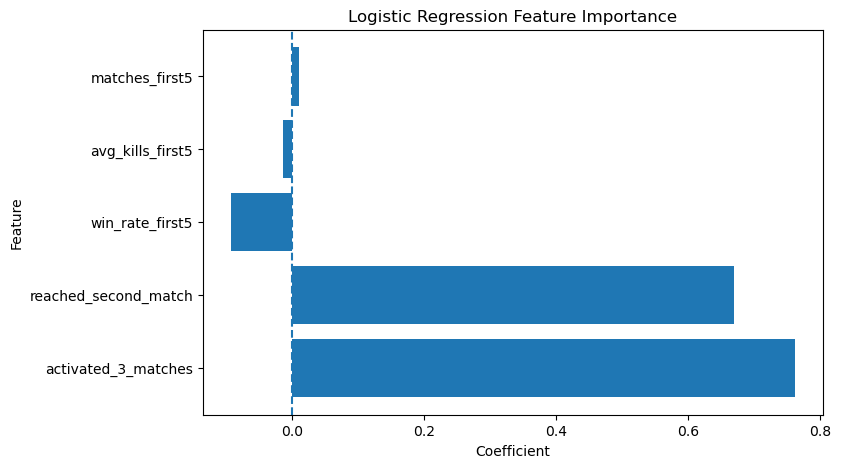

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    feature_importance['feature'],
    feature_importance['coefficient']
)
plt.axvline(0, linestyle='--')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [33]:
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [35]:
feature_importance.to_csv('feature_importance.csv', index=False)